In [1]:
SERVICE_ACCOUNT='darrollsaddi@floodfinder.iam.gserviceaccount.com'
KEY = 'my-secret-key.json'
!gcloud iam service-accounts keys create {KEY} --iam-account {SERVICE_ACCOUNT}

created key [f704e5addd52a1954fb48e80548ac126bc758356] of type [json] as [my-secret-key.json] for [darrollsaddi@floodfinder.iam.gserviceaccount.com]


In [2]:
from google.auth.transport.requests import AuthorizedSession
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('my-secret-key.json')
scoped_credentials = credentials.with_scopes(['https://www.googleapis.com/auth/cloud-platform'])

session = AuthorizedSession(scoped_credentials)

url = 'https://earthengine.googleapis.com/v1alpha/projects/earthengine-public/assets/GOOGLE/DYNAMICWORLD/V1'

response = session.get(url)

from pprint import pprint
import json
pprint(json.loads(response.content))


{'id': 'GOOGLE/DYNAMICWORLD/V1',
 'name': 'projects/earthengine-public/assets/GOOGLE/DYNAMICWORLD/V1',
 'type': 'IMAGE_COLLECTION',
 'updateTime': '2024-04-28T04:18:14.536642Z'}


In [75]:
import urllib
# import ee
# ee.Authenticate()
# ee.Initialize(project='floodfinder')
# print(ee.String('Hello from the Earth Engine servers!').getInfo())
# START = ee.Date('2021-04-02')
# END = START.advance(1, 'day')
#38.5449° N, 121.7405° W
coords = [38.5449, 38.5449]

project = 'projects/earthengine-public'
asset_id = 'GOOGLE/DYNAMICWORLD/V1'
name = '{}/assets/{}'.format(project, asset_id)
url = 'https://earthengine.googleapis.com/v1alpha/{}:listImages?{}'.format(
  name, urllib.parse.urlencode({
    'startTime':'2018-04-01T00:00:00.000Z',
    'endTime': '2018-05-01T00:00:00.000Z',
    'region': '{"type":"Point", "coordinates":' + str(coords) + '}',
    #'filter': 'CLOUDY_PIXEL_PERCENTAGE < 10',
}))
#print(url)
response = session.get(url)
content = response.content

#print(json.loads(content))
coordinates = []
for asset in json.loads(content)['images']:
    #print(asset)
    asset_id = asset['id']
    #pprint(asset)
    coordinates.append(asset['geometry']['coordinates'])
    #pprint('%s : %s' % (id, coordinates))
print(asset_id)
pprint(asset)
pprint(len(coordinates))

GOOGLE/DYNAMICWORLD/V1/20180423T080611_20180423T081310_T37SDC
{'bands': [{'dataType': {'precision': 'DOUBLE'},
            'grid': {'affineTransform': {'scaleX': 10,
                                         'scaleY': 10,
                                         'translateX': 400150,
                                         'translateY': 4190420},
                     'crsCode': 'EPSG:32637',
                     'dimensions': {'height': 10942, 'width': 10940}},
            'id': 'water',
            'pyramidingPolicy': 'MEAN'},
           {'dataType': {'precision': 'DOUBLE'},
            'grid': {'affineTransform': {'scaleX': 10,
                                         'scaleY': 10,
                                         'translateX': 400150,
                                         'translateY': 4190420},
                     'crsCode': 'EPSG:32637',
                     'dimensions': {'height': 10942, 'width': 10940}},
            'id': 'trees',
            'pyramidingPolicy': 'ME

In [76]:
#'COPERNICUS/S2/20170430T190351_20170430T190351_T10SEG'
#asset_id = 'GOOGLE/DYNAMICWORLD/V1/20180415T184921_20180415T185613_T10SEG'

name = '{}/assets/{}'.format(project, asset_id)
url = 'https://earthengine.googleapis.com/v1alpha/{}'.format(name)

response = session.get(url)
content = response.content

asset = json.loads(content)
print(asset)
print('Band Names: %s' % ','.join(band['id'] for band in asset['bands']))
print('First Band: %s' % json.dumps(asset['bands'][0], indent=2, sort_keys=True))

{'type': 'IMAGE', 'name': 'projects/earthengine-public/assets/GOOGLE/DYNAMICWORLD/V1/20180423T080611_20180423T081310_T37SDC', 'id': 'GOOGLE/DYNAMICWORLD/V1/20180423T080611_20180423T081310_T37SDC', 'properties': {'dynamicworld_algorithm_version': '3.5', 'qa_algorithm_version': '1'}, 'updateTime': '2024-04-28T05:19:56.394761Z', 'startTime': '2018-04-23T08:13:10.570Z', 'geometry': {'type': 'Polygon', 'coordinates': [[[37.84940642623378, 38.84167179298009], [37.85724876653536, 38.34876269792415], [37.864901742558956, 37.855818220430045], [37.86494869238744, 37.85577720960645], [37.86498876161493, 37.85573189814334], [37.865002846551796, 37.85572993394104], [37.865017093383045, 37.85572937082312], [38.02044094564563, 37.857122020842404], [38.175870240010006, 37.85831037639503], [38.33130411527927, 37.85929442215575], [38.486741710005006, 37.860074145431355], [38.64218216255014, 37.86064953615173], [38.79762461113386, 37.861020586905795], [38.95306819386759, 37.86118729289652], [39.108512048

In [77]:
import numpy
import io

name = '{}/assets/{}'.format(project, asset_id)
url = 'https://earthengine.googleapis.com/v1alpha/{}:getPixels'.format(name)
body = json.dumps({
    'fileFormat': 'NPY',
    # 'grass', 'flooded_vegetation', 'crops', 'shrub_and_scrub', 'build', 'bare', 'snow_and_ice', 'label'
    'bandIds': ['label'],
    'grid': {
        'affineTransform': {
            "scaleX": 10,
            "scaleY": 10,
            "translateX": 300190,
            "translateY": 4190420
        },
        'dimensions': {'width': 256, 'height': 256},
    },
})

pixels_response = session.post(url, body)
pixels_content = pixels_response.content

array = numpy.load(io.BytesIO(pixels_content))
print('Shape: %s' % (array.shape,))
print('Data:')
print(array)

Shape: (256, 256)
Data:
[[(0,) (0,) (0,) ... (0,) (0,) (0,)]
 [(0,) (0,) (0,) ... (0,) (0,) (0,)]
 [(0,) (0,) (0,) ... (0,) (0,) (0,)]
 ...
 [(0,) (0,) (0,) ... (0,) (0,) (0,)]
 [(0,) (0,) (0,) ... (0,) (0,) (0,)]
 [(0,) (0,) (0,) ... (0,) (0,) (0,)]]


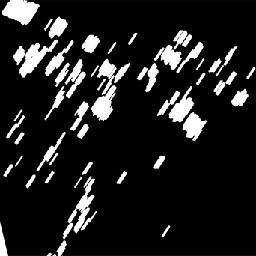

In [79]:
url = 'https://earthengine.googleapis.com/v1alpha/{}:getPixels'.format(name)
body = json.dumps({
    'fileFormat': 'PNG',
    'bandIds': ['water'],
    'region': asset['geometry'],
    'grid': {
        'dimensions': {'width': 256, 'height': 256},
    },
    'visualizationOptions': {
        'ranges': [{'min': 0, 'max': 3000}],
    },
})

image_response = session.post(url, body)
image_content = image_response.content

from IPython.display import Image
Image(image_content)

In [1]:
import folium

# Create a map centered at a specific location
mymap = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for the coordinates
marker1 = folium.Marker(location=[40.7128, -74.0060], popup="Marker 1", icon=folium.Icon(color='blue'))
marker2 = folium.Marker(location=[34.0522, -118.2437], popup="Marker 2", icon=folium.Icon(color='red'))

# Add markers to the map
marker1.add_to(mymap)
marker2.add_to(mymap)

# Save the map to an HTML file
mymap.save("map.html")